## BaseForestplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

import myforestplot as mfp

%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz


Last updated: Tue Sep 06 2022

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

graphviz: not installed

numpy       : 1.21.5
matplotlib  : 3.5.1
pandas      : 1.4.1
myforestplot: 0.1.3
statsmodels : 0.13.2

Watermark: 2.3.1



### Label names, ORs, left side spines, and ylabel ticks

In [2]:
# Sample data preparation
data = (pd.read_csv("titanic.csv")
      [["survived", "pclass", "sex", "age", "embark_town"]]
      .dropna()
      )

ser = data["age"]
data["age"] = (ser
             .mask(ser >= 40, "40 or more")
             .mask(ser < 40, "20_39")
             .mask(ser <20, "0_19")
             )
# Fit logistic regression
res = smf.logit("survived ~ sex + age + embark_town", data=data).fit()

order = ["age", "sex", "embark_town"]
cont_cols = ["age"]
item_order = {"embark_town": ['Southampton', 'Cherbourg', 'Queenstown']}
df_res = mfp.statsmodels_pretty_result_dataframe(data, res,  
                                             order=order,
                                             cont_cols=cont_cols,
                                             item_order=item_order,
                                             fml=".3f", 
                                             )
df = df_res.copy()
df["xerr_lower"] = df["risk"] - df[0]
df["xerr_upper"] = df[1] - df["risk"]

Optimization terminated successfully.
         Current function value: 0.509862
         Iterations 6


In [3]:
df

,category,item,0,1,risk,nobs,risk_pretty,xerr_lower,xerr_upper
1,age,20_39,0.509199,1.251529,0.798296,NaN,"0.80 (0.51, 1.25)",0.289098,0.453233
2,age,40 or more,0.415780,1.230498,0.715274,NaN,"0.72 (0.42, 1.23)",0.299494,0.515224
0,sex,male,0.057797,0.122138,0.084019,453.0,"0.08 (0.06, 0.12)",0.026222,0.038119
5,sex,female,NaN,NaN,NaN,259.0,Ref.,NaN,NaN
4,embark_town,Southampton,0.229981,0.582518,0.366016,554.0,"0.37 (0.23, 0.58)",0.136035,0.216501
6,embark_town,Cherbourg,NaN,NaN,NaN,130.0,Ref.,NaN,NaN
3,embark_town,Queenstown,0.055646,0.457460,0.159549,28.0,"0.16 (0.06, 0.46)",0.103903,0.297911


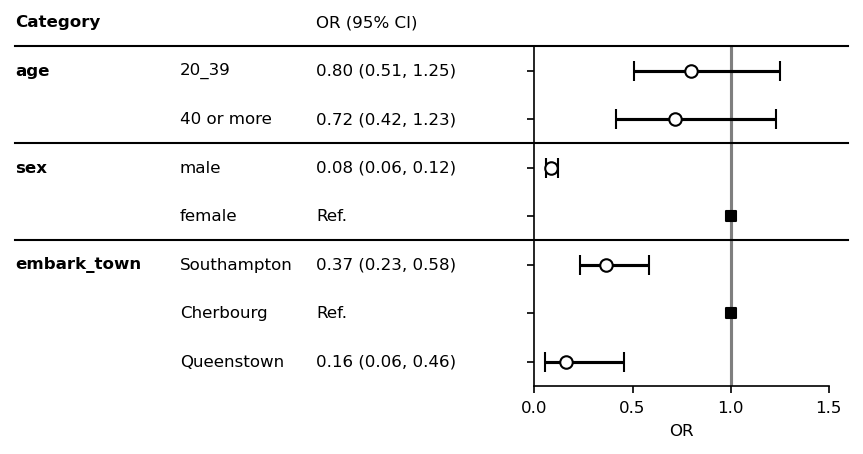

In [4]:
plt.rcParams["font.size"] = 8
fp = mfp.BaseForestplot(ratio=(5,3), 
                    figsize=(7,3), 
                    dpi=150, 
                    df=df,
                    hide_spines=["top", "right"],
                    yticks_show=True)

fp.errorbar()
fp.ax2.set_xlim([0, 1.5])
fp.ax2.set_xticks([0, 0.5, 1, 1.5])
fp.ax2.set_xlabel("OR")
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)

fp.ax1.set_xlim([0.3, 1])
fp.embed_strings("category", 0.3, header="Category",
                 duplicate_hide=True,
                 text_kwds=dict(fontweight="bold"),
                 header_kwds=dict(fontweight="bold")
                 )
fp.embed_strings("item", 0.53, header="", replace={"age":""})
fp.embed_strings("risk_pretty", 0.72, header="OR (95% CI)")
fp.horizontal_variable_separators()

### Change styles of errorbars and horizontal lines 

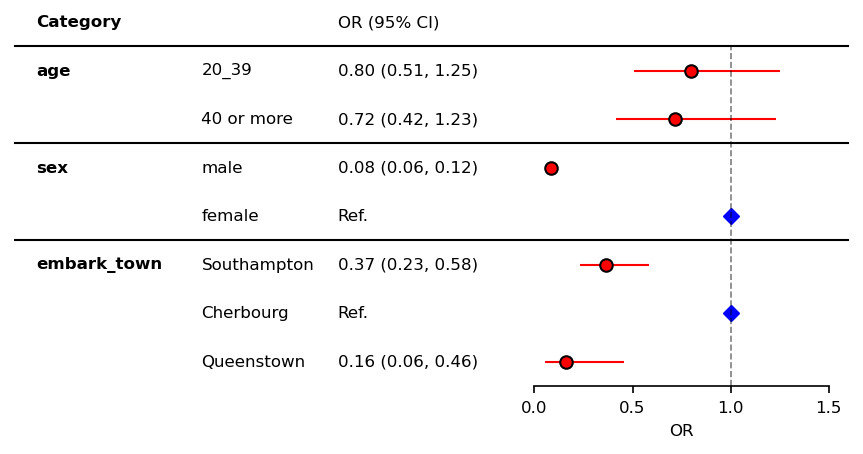

In [5]:
plt.rcParams["font.size"] = 8
errorbar_kwds = dict(fmt="o", 
                     capsize=0, 
                     lw=1,
                     markeredgecolor="black",  
                     ecolor="red", 
                     color='red'
                     )
ref_kwds = dict(marker="D", s=26, color="blue")

fp = mfp.BaseForestplot(ratio=(5,3), 
                    figsize=(7,3), 
                    dpi=150, 
                    df=df,
                    )
fp.errorbar(errorbar_kwds=errorbar_kwds, ref_kwds=ref_kwds)
fp.ax2.set_xlim([0, 1.5])
fp.ax2.set_xticks([0, 0.5, 1, 1.5])
fp.ax2.set_xlabel("OR")
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, 
               color="black", alpha=0.5, ls="--", lw=0.8)

fp.ax1.set_xlim([0.3, 1])
fp.embed_strings("category", 0.33, header="Category",
                 duplicate_hide=True,
                 text_kwds=dict(fontweight="bold"),
                 header_kwds=dict(fontweight="bold")
                 )
fp.embed_strings("item", 0.56, header="", replace={"age":""})
fp.embed_strings("risk_pretty", 0.75, header="OR (95% CI)")
fp.horizontal_variable_separators()